## Um problema maior, do tamanho de um Návio!

Que tal pegarmos uma base de dados da vida real e trabalhar um pouco mais com algoritmos de classificação?

Dessa vez, vamos usar um base classicamente usada para aprender aprendizado de maquina: A `Titanic`. Essa base descreve, para cada passageiro no histórico návio, se ele sobreviveu ou não aquela tragédia. Dentro das nossas `features` temos informações numéricas como idade e número de parentes a bordo, catégoricas como sexo e portão de embarque e até colunas que descrevem em qual cabine aquele passageiro estava dormindo!

### Questão 1

Nossa missão aqui é predizer quando um determinado passageiro sobreviveu ou não, sendo `1` sobreviveu e `0` não sobreviveu. Mas antes vamos tomar um tempo para estudar a base! Vamos usa-la bastante nesse exercício então precisamos nos familiarizar.

Carregue a base `dataset/titanic_test.csv` e `dataset/titanic_train.csv`. Repare que como nossos dados estão separados em arquivos não iremos precisar usar o train_test_split!

Através do arquivo de treino (`dataset/titanic_train.csv`) Visualize graficamente cada coluna, suas distribuições, sua cardinalidade, etc...

Talvez você irá precisar de um catálogo explicando o que cada coluna que pode ser [encontrado aqui](https://www.kaggle.com/c/titanic/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Questão 1
#Escreva aqui o comando para importar os dados do arquivo titanic_train.csv para o seu dataframe usando pandas
#lembra como ler(read em inglês) o arquivo?


In [3]:
# Carregar o dataset de treino
train_data = pd.read_csv('titanic_train.csv')

In [ ]:
# Questão 2
# Agora de uma olhada nos dados para se familizarizar com as colunas númericas. Dica: descreva os dados? (describe)


In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Descrever estatísticas das colunas numéricas
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## Questão 3
#sera que temos dados nulos? se sim, quantos? (isnull com um sum)


In [6]:
# Contar o número de valores nulos em cada coluna
null_counts = train_data.isnull().sum()
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Questão 5
#plot um gráfico contando (count) a quantidade de pessoas que sobreviveram. Essa informação está na coluna `Survived`
#dica1 plt.figure(figsize=(8,6))


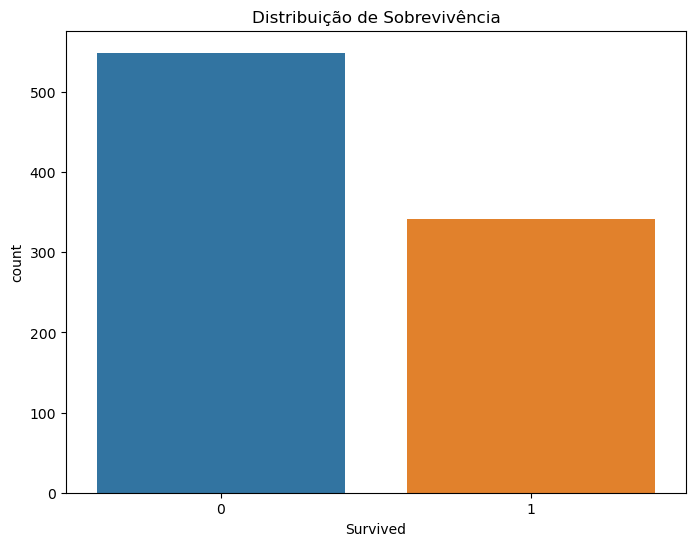

In [7]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Plotar gráfico de contagem para a coluna 'Survived'
sns.countplot(x='Survived', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Sobrevivência')
plt.show()

In [ ]:
#Questão 5
#plot um gráfico contando (count) a quantidade de pessoas por gênero. Essa informação está na coluna `Sex`
#dica1 plt.figure(figsize=(8,6))

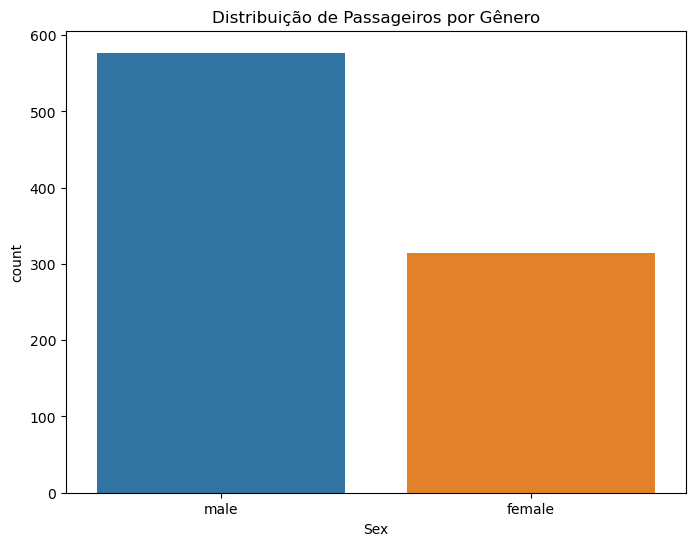

In [8]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Plotar gráfico de contagem para a coluna 'Sex'
sns.countplot(x='Sex', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Passageiros por Gênero')
plt.show()

In [ ]:
#Questão 6
#plot um gráfico contando (count) a quantidade de pessoas que sobreviveram por sexo. Essas informações estão nas colunas `Survived` e `Sex`
#dica1 plt.figure(figsize=(8,6))
#dica 2 x='Survived', hue='Sex'


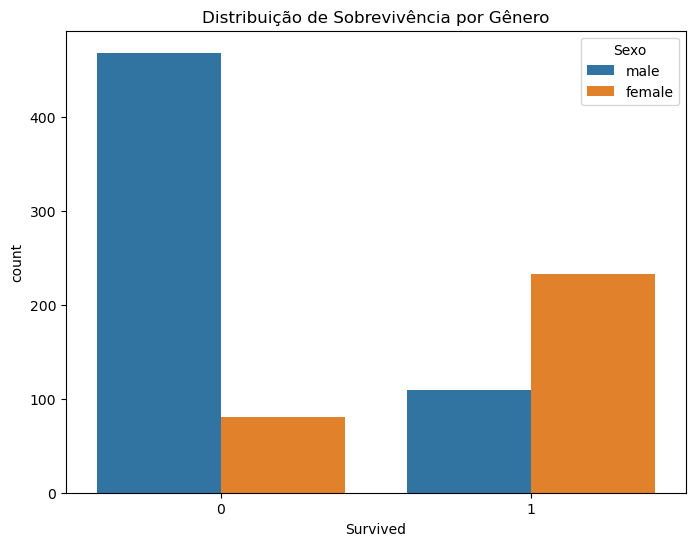

In [9]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Plotar gráfico de contagem para a coluna 'Survived' diferenciado por 'Sex'
sns.countplot(x='Survived', hue='Sex', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Sobrevivência por Gênero')
plt.legend(title='Sexo')
plt.show()

In [ ]:
#Questão 7
#agora veja como são os sobreviventes de acordo com as suas classes. Essa informação está na coluna `Pclass`
#dica1 plt.figure(figsize=(8,6))

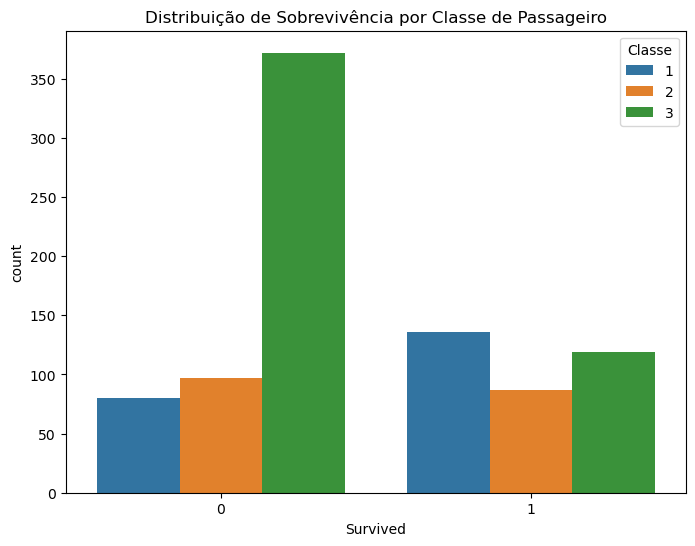

In [11]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Plotar gráfico de contagem para a coluna 'Survived' diferenciado por 'Pclass'
sns.countplot(x='Survived', hue='Pclass', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Sobrevivência por Classe de Passageiro')
plt.legend(title='Classe')
plt.show()

In [ ]:
#Questão 8
#Que tal agora fazemos um boxplot para juntarmos em um mesmo gráfico quem sobreviveu, seu gênero e sua idade?
#dica1 plt.figure(figsize=(8,6))
#dica 2 x='Survived', y= 'Age', hue='Sex'

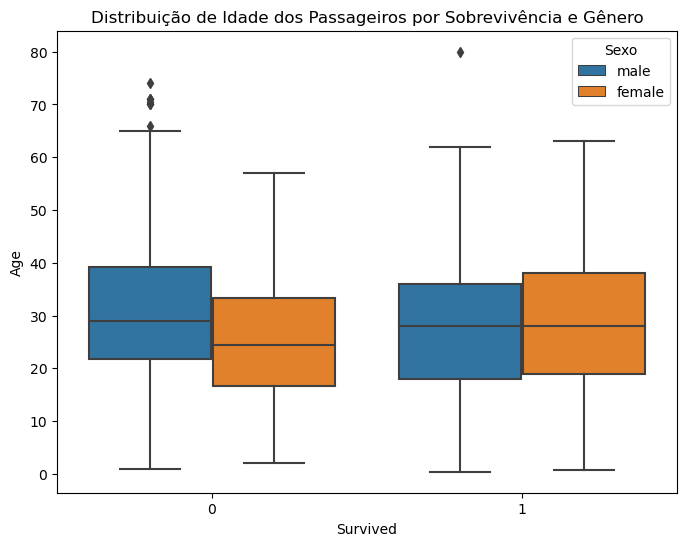

In [12]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Criar boxplot
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Idade dos Passageiros por Sobrevivência e Gênero')
plt.legend(title='Sexo')
plt.show()


In [ ]:
#Questão 9
#Como seria um boxplot da classe `Pclass` pela tarifa `Fare`?
#dica1 plt.figure(figsize=(8,6))

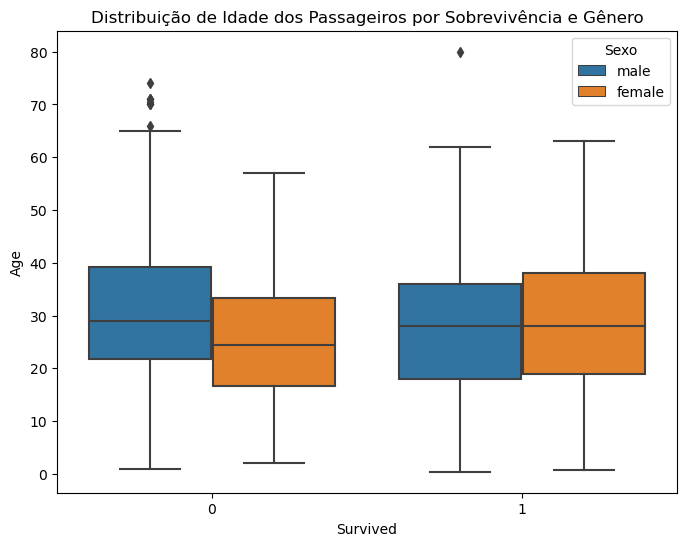

In [13]:
# Ajustar o tamanho da figura
plt.figure(figsize=(8,6))

# Criar boxplot
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train_data)

# Definir título e mostrar o gráfico
plt.title('Distribuição de Idade dos Passageiros por Sobrevivência e Gênero')
plt.legend(title='Sexo')
plt.show()

## Usando Regressão Logística em problemas reais

A regressão logística é um algoritmo de classificação binária, porém ele usa os mesmos princípios da regressão linear para resolver seus problemas.

Logo, nossa entrada `X` precisa ser uma sequência de colunas numéricas e `y` uma coluna única binária.

Olhando para a base do Titanic, é notavel que nosso `y` esta num formato adequado, porém, muitas colunas promissoras para nosso modelo não estão, como `gender`, `Pclass` e `Embarked`.

Para torna-las númericas, precisamos **transforma-las em mais colunas e torna-las boolenas**. Isso porque não sabemos se elas tem alguma correlação, logo seria errado colocar por exemplo `Male = 1` e `Female = 0`. Para esse processo usamos um método de pré-processamento chamada **one-hot enconding**. Ainda vamos aprofundar nesse conceito na próxima aula. Por enquanto será suficiente apenas executar os comandos abaixo.

### OneHotEnconding

Rode o comando do scikit learn de OneHotEnconding nas colunas `gender`, `Pclass` e `Embarked`. Se quiser entender melhor o que está acontecendo, você acha a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) mas sinta-se livre para encontrar suas próprias fontes.

In [15]:
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv('titanic_train.csv') #aqui estamos carregando os dados de train para o dataframe

encoder = OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(train_df[['Sex', 'Pclass', 'Embarked']]))
train_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
train_df.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
train_df = pd.concat([train_df, train_X_encoded ], axis=1)

train_df.head() #novo dataframe após rodarmos o OneHotEncoder. Você consegue ver o que mudou?

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Normalizando

Note que agora, todas as nossas colunas categóricas relevantes tem suas contrapartes categóricas (inclusive mais de uma).

Esse processo que estamos fazendo se chama _pré-processamento_ e está centrado em tornar nossas bases adequadas para o algoritmo que pretendemos usar.

Vamos então entender um novo processo de pré-processamento, agora para variáveis númericas. Uma boa prática que facilita o trabalho do nosso modelo é **normalizarmos variáveis numéricas**. Isto é, deixa-las todas com um `range` semelhante.

Para isso podemos usar o `StandardScaler`, da biblioteca sklearn, para aplicarmos essas operações em nossa base, vamos aplica-las nas colunas `Age`, `SibSp` e `Fare`.

Lembrando que para entender como usa você deve pesquisar por referência e exemplos na internet, e nunca se esqueça de olhar a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Novamente, não se preocupe tanto com esse passo. Os comandos a serem executados estão logo abaixo. Substitua as colunas originais pelo resultado alcançado. Mas tente entender o que está acontecendo

In [16]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'SibSp', 'Fare']

ss = StandardScaler()

ss.fit(train_df[features])

train_df[features] = ss.transform(train_df[features])

train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",-0.530377,0.432793,0,A/5 21171,-0.502445,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.571831,0.432793,0,PC 17599,0.786845,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",-0.254825,-0.474545,0,STON/O2. 3101282,-0.488854,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.365167,0.432793,0,113803,0.420730,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",0.365167,-0.474545,0,373450,-0.486337,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Eliminando valores nulos

Agora antes de irmos adiante existe uma coisa sobre regressão logística e valores numéricos que precisamos saber: _Regressões odeiam valores nulos!_ (você consegue entender o porque disso?)

Analise as três colunas geradas e verifique se temos valores nulos nelas

Substitua esses valores nulos pela mediana, essa é uma tecnica comum para evitar problemas de valores nulos.

Uso métodos do pandas para isso. Essa aqui eu deixo com vocês escrever o código para fazer isso.

In [ ]:
#Questão 10
#preencha os valores vazios da cooluna `Age` com a média da idade dos passageiros

In [17]:
# Calculando a média da coluna Age
mean_age = train_df['Age'].mean()

# Preenchendo os valores NaN na coluna Age com a média
train_df['Age'].fillna(mean_age, inplace=True)

### Ajustando o arquivo de teste

Como voce percebeu, fizemos diversas alterações nos dados que carregamos do arquivo 'titanic_train.csv'
Precisamos repetir os mesmos passos para os dados de teste! Os comandos são os mesmos.

Carregue a base de teste e faça as mesmas transformações (`OneHotEnconding` e `StandardScalar`).

In [23]:
test_df = pd.read_csv('titanic_test.csv')

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


features = ['Age', 'SibSp', 'Fare']
test_df[features] = ss.transform(test_df[features])

encoder = OneHotEncoder(sparse=False)

test_X_encoded = pd.DataFrame(encoder.fit_transform(test_df[['Sex', 'Pclass', 'Embarked']]))
test_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
test_df.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
test_df = pd.concat([test_df, test_X_encoded ], axis=1)

Perceba que a coluna `Survived` não esta no arquivo `titanic_test.csv`,ao invés disso está no arquivo `titanic_test_results.csv`.
Vamos aproveitar e já deixar tudo preparado. Apenas execute os comandos abaixo mas sempre entendendo o que está acontecendo!

In [24]:
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'] #estamos escolhendo as colunas/features/variáveis que usaremos no nosso modelo

train_df_X = train_df[features] #carregamos apenas elas para o nosso X

train_df_y = train_df[['Survived']] #aqui carregamos o nosso Y

### Fazendo a previsão

Agora vamos aplicar a regressão logística!

Lembre-se de usar apenas as colunas numéricas que geramos nos últimos dois exercícios. Para o arquivo de testes nos já retiramos mas garanta passando apenas as colunas que quer usar



Apresente na tela a `accuracy_score`. Para fins do exercício usaremos a acurácia para ver quão bom são nossos modelos. Lembre-se que quanto maior a nossa acurácia, melhor o modelo! (será que isso é sempre verdade?)

In [25]:
#Questão 11
#rode um modelo (modeloLR) de regressão logiística (LogisticRegression no scikit learn)
#importe o modelo, inicie o modelo e depois treine o modelo (fit)


In [26]:
# 1. Importar o modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# 2. Iniciar o modelo
modeloLR = LogisticRegression(max_iter=1000)  # max_iter é definido para garantir a convergência em datasets maiores

# 3. Treine o modelo

modeloLR.fit(train_df_X, train_df_y)

LogisticRegression(max_iter=1000)

### Verificando a performance nos dados de testes
Como nossos dados estão em 2 arquivos diferentes, agora que temos o modelo treinado (.fit()) precisamos ver como ele se sai com dados q nunca viu. Os dados do arquivo "titanic_test.csv" nunca foram vistos pelo modelo. Vamos carrega-lo e colocar as colunas preditoras ou variáveis independentes para ser o nosso X.
O valor correto, variável dependente (a resposta final) está também em um terceiro arquivo "titanic_test_results.csv". Dessa forma esses são os dados que vamos levar para o nosso Y

Após carregar esses dois arquivos em dataframes, precisamos pegar o modelo treinado e ver como ele de fato se sai com esses dados. Apenas execute os comandos abaixo mas procure entender o que está acontecendo!

In [ ]:
'''features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'] #escolhendo quais features iremos usar

test_df['Embarked_nan'] = 0

test_df_X = test_df[features] #carregando as variáveis independentes

test_df_y = pd.read_csv('titanic_test_results.csv')[['Survived']] #carregando a variável dependente'''


### Calculando como o modelo se saiu com os dados de teste
Agora que todos os dados já foram é a hora de pedir para o modelo prever o resultado com base nos dados do arquivo teste e após isso, vamos calcular a acurácia do modelo usado "accuracy_score". Não se preocupe, essa última parte do código já está escrita para você.

In [ ]:
#Questão 12
#Agora é a hora da verdade!
#Rode um predict no seu modelo salvando o resultado em y_predRL

In [27]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloLR.predict(test_df_X)

In [29]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('submission.csv', index=False)

### Verificando o resultado Final
Execute os comandos abaixo para sabermos a acurácia do nosso modelo! E ae, o que achou do resultado final? Bom? Ruim? Suficiente?

In [ ]:
'''from sklearn import metrics
#por fim, comparamos o valor que o modelo previu (y_predRL) com o valor que ele deveria ter previsto (test_df_y)
print("Acurácia do modelo de Regressão Logística: {}".format(metrics.accuracy_score(test_df_y, y_predRL).round(8)))'''

## Ampliando a Caixa de Ferramentas

Muito bem, nos últimos preparamos dados reais para aplicar em um algoritmo de regressão logistica e obter um resultado satisfatório, mas e agora?

Se você acessar a [documentação do Sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) verá que existem diversos algoritmos de classificação, como vamos saber se, dentre todas as alternativas a nossa regressão logistica é a melhor?

Uma atividade comum entre ciêntistas de dados é treinar inúmeros modelos para um mesmo problema e compará-los através de alguma ferramenta estatística. Muitas vezes um modelo especifico pode performar melhor diante de um problema por algum detalhe que muitas vezes o ciêntista de dados desconhece no momento.

Então, para essa última etapa, vamos apresentar para vocês outros algoritmos de classificação. Repita os últimos passos de treino, predição e acurácia para vermos como eles se saem.

### DecisionTree

A arvore de decisão é uma das estruturas mais intuitivas de classificação, ela basicamente pega as colunas que temos e cria regras de separação até que tenhamos uma sequencia de regras que atribui com alguma acurácia entre nossas classes.

A melhor forma de entender esse modelo é usá-lo e visualizar sua árvore, por isso vamos trabalhar com a base do Titanic novamente.

In [ ]:
#Questão 13
#Use uma árvore de decisão para criar um novo modelo (modeloDT). Passe como parâmetro para a árvore a profundidade máxima de 3 (max_depth=3)


In [30]:
# 1. Importar o modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Iniciar o modelo com profundidade máxima de 3
modeloDT = DecisionTreeClassifier(max_depth=3)

# 3. Treinar o modelo
# Estamos usando o mesmo X_train e y_train definidos anteriormente
modeloDT.fit(train_df_X, train_df_y)

DecisionTreeClassifier(max_depth=3)

### Visualizando a árvore de decisão

Uma das vantagens das árvores de decisão é que podemos visualizar o seu resultado. Execute o código abaixo para plotarmos o resultado final e tente entender passo a passo o que está acontecendo.

O método `plot_tree` presente na biblioteca do sklearn apresenta na tela o modelo que acabamos de construir. Execute os comandos abaixo e interprete o resultado

In [31]:
test_df_X.columns #visualizando as colunas usadas no teste

Index(['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

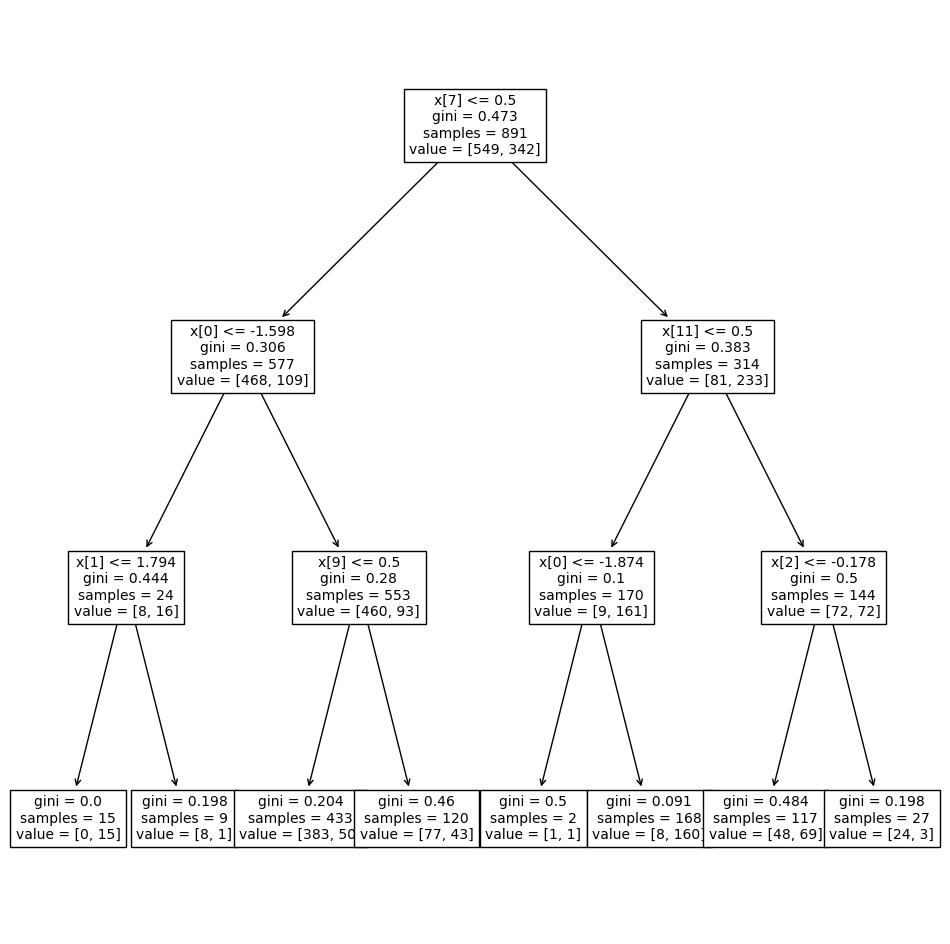

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(modeloDT, fontsize=10)
plt.show()

In [33]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloDT.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('submission.csv', index=False)

## Support Vector Machine

Suppoer Vector Machine, Máquina de vetores de suporte ou simplesmente SVM é a abordagem popular de classificação baseado em um conjunto de separadores lineares, a matemática por trás é bem interessante e você pode [conhecer mais por aqui](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989). Porém, hoje, focaremos apenas na implementação.

Procure pela implementação `SVC` do skelearn, que é a implementação de SVM aplicada a problemas de classificação e aplique a nossa base `Titanic`. Procure também entender os parametros `C` e `kernel` do modelo, brinque um pouco com eles e teste diferentes valores, o que você percebe no resultado?


In [ ]:
#Questão 14
#Use o SVM (SVC - modeloSVC). Para prever os valores. Troque o `Kernel` do modelo e o hiperparâmetro C.
#Será que você consegue obter valores melhores do que os já alcançados até agora?

In [34]:
# 1. Importar o modelo SVC
from sklearn.svm import SVC

# 2. Iniciar o modelo
# Vamos começar com um kernel RBF e C=1.0
modeloSVC = SVC(kernel='rbf', C=1.0)

# 3. Treinar o modelo
modeloSVC.fit(train_df_X, train_df_y)

SVC()

In [35]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloSVC.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('submission.csv', index=False)

In [ ]:
#Questão 15
#Use o Naive Bayes (modeloNB).
#Será que você consegue obter valores melhores do que os já alcançados até agora?

In [36]:
# 1. Importar o modelo GaussianNB
from sklearn.naive_bayes import GaussianNB

# 2. Iniciar o modelo
modeloNB = GaussianNB()

# 3. Treinar o modelo
modeloNB.fit(train_df_X, train_df_y)

GaussianNB()

In [37]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloNB.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('submission.csv', index=False)

In [38]:
#Questão 16
#O bom e conhecido KNN! Use o KNN (modeloKNN). Para prever os valores.
#Será que você consegue obter valores melhores do que os já alcançados até agora?
#se você usar n_neighbors=2, o resultado melhora ou piora? E se for n_neighbors=10?

In [39]:
# 1. Importar o modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2. Iniciar o modelo com n_neighbors=5 (padrão)
modeloKNN_5 = KNeighborsClassifier()
modeloKNN_5.fit(train_df_X, train_df_y)

# Iniciar o modelo com n_neighbors=2
modeloKNN_2 = KNeighborsClassifier(n_neighbors=2)
modeloKNN_2.fit(train_df_X, train_df_y)

# Iniciar o modelo com n_neighbors=10
modeloKNN_10 = KNeighborsClassifier(n_neighbors=10)
modeloKNN_10.fit(train_df_X, train_df_y)

KNeighborsClassifier(n_neighbors=10)

In [42]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloKNN_10.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('modeloKNN_10.csv', index=False)

In [ ]:
#Questão 17
#Rode o otimizador SGD
#se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?
#Como saber qual o melhor resultado podemos obter com esse modelo?

In [50]:
# 1. Importar o modelo SGDClassifier
from sklearn.linear_model import SGDClassifier

# 2. Iniciar e treinar o modelo
modeloSGD = SGDClassifier()
modeloSGD.fit(train_df_X, train_df_y)

SGDClassifier()

In [52]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloSGD.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('SGDClassifier.csv', index=False)

In [ ]:
#Questão 18
#Rode o otimizador RandomForest
#se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?
#Como saber qual o melhor resultado podemos obter com esse modelo?
#se alterarmos o valor de n_estimators e min_samples_leaf, os resultados mudam?

In [45]:
from sklearn.ensemble import RandomForestClassifier

modeloRF = RandomForestClassifier(random_state=42)
modeloRF.fit(train_df_X, train_df_y)

RandomForestClassifier(random_state=42)

In [46]:
# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = modeloRF.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('modeloRF.csv', index=False)

In [47]:
# Importando as bibliotecas necessárias:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definindo o conjunto de hiperparâmetros que você deseja testar:
param_grid = {
    # O número de árvores na floresta.
    'n_estimators': [50, 100, 200, 500],
    
    # O número mínimo de amostras necessárias para estar em um nó folha.
    'min_samples_leaf': [1, 2, 4, 8, 16],
    
    # O número de features a considerar ao procurar a melhor divisão:
    # - auto: utiliza todos os recursos
    # - sqrt: utiliza a raiz quadrada do número de recursos
    'max_features': ['auto', 'sqrt'],
    
    # A profundidade máxima da árvore. Se None, os nós são expandidos até
    # conter menos do que min_samples_split amostras.
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Inicializando o modelo RandomForest:
rf = RandomForestClassifier(random_state=42)

# Configurando o GridSearch:
# - estimator: o modelo que você deseja treinar
# - param_grid: os hiperparâmetros que você deseja testar
# - cv: número de divisões de validação cruzada
# - n_jobs: número de núcleos da CPU a serem usados ​​durante a busca. -1 significa usar todos os núcleos.
# - verbose: controla a verbosidade: quanto maior o número, mais mensagens.
# - scoring: métrica de avaliação a ser usada (neste caso, precisão)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Treinando o GridSearch com os dados:
# - isso fará com que o GridSearch teste todas as combinações de hiperparâmetros 
#   no RandomForest usando validação cruzada. 
# - Depois de treinado, o objeto grid_search conterá informações sobre o melhor 
#   conjunto de hiperparâmetros encontrado.
grid_search.fit(train_df_X, train_df_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=2)

In [48]:
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)

Melhores hiperparâmetros: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50}
Melhor score: 0.8283095850856819


In [49]:
best_rf = grid_search.best_estimator_

# Usando o modelo treinado para fazer previsões no conjunto de teste
y_predLR = best_rf.predict(test_df_X)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predLR
    })


submission.to_csv('best_rf.csv', index=False)

In [ ]:
#Questão 19
#Qual modelo entregou a maior acurácia?

Regressão Logistica com Score: 0.75358